In [1]:
import json
import warnings
warnings.simplefilter('ignore')
from core.analysis import *

<Figure size 432x288 with 0 Axes>

## Data Prep

In [2]:
db = access_db()

In [3]:
trials = get_trial_data(db)

In [4]:
participants = get_participant_data(db)

In [5]:
participants

,userID,workerID,userIP,completedTask,timeTaken
0,-M3YlGUPp4pdgYG4RgX6,1234,-1145448243,0,1.716
1,-M3YlH-n66PcsiHbd0su,1234,-1145448243,1,1013.671
2,-M3bd4BdaOnbVL8LxjII,63323184988,-750511298,0,28.887
3,-M3dFu6M2DvitHICPl2A,57581526600,-1145448243,1,1079.527
4,-M3gbBt2HXn9eYtpcRuA,55560552841,-669241352,1,9221.999
...,...,...,...,...,...
76,-M4pfKR1aZhOH7P3-jH7,6481,-750511298,0,2.514
77,-M4phEOn28r4-GURcBhK,6481,-750511298,0,1.938
78,-M4phJIcPlQlAWL2lxbx,6481,-750511298,0,1.119
79,-M4pj4q2HycCao8j_oSx,93208549-71e6-4823-a839-8d950e1b8a19,-1145448243,0,1.725


In [7]:
participants[participants['workerID'] == '10785923479']

,userID,workerID,userIP,completedTask,timeTaken
63,-M4albOg4dRkfficH-mE,10785923479,436844834,1,512.693


In [6]:
wids = [27046826551,67313721753,14715705020,65643517184,86979612220,4949336941,26312944991,46875911951,43605166255, 10785923479]
#Worker IDs of subjects who completed expt
wids = [str(i) for i in wids]

Getting data for users who completed the experiment

In [7]:
user_df = participants[participants['workerID'].isin(wids) & participants['completedTask'] == 1]
user_df

,userID,workerID,userIP,completedTask,timeTaken
22,-M3pVTw9ili6muvdZKg4,27046826551,-188934845,1,546.814
23,-M3qqejnlf4v_ja8eE7n,67313721753,727219182,1,526.296
29,-M3rSxyqKh87n8IxCNFz,14715705020,1146968680,1,597.604
31,-M3tou9y2NuJSM2wEped,65643517184,-15487531,1,712.426
33,-M3wWKZuvM6607THGsj3,86979612220,-1107186255,1,308.230
34,-M3xbEdg3XIZca4MA7SZ,26312944991,-1470029051,1,924.305
36,-M40VLLla6hlhfPLwyWk,4949336941,-1012892879,1,921.908
55,-M4RJU1sPJwCqxkN93qZ,46875911951,1225707233,1,706.181
58,-M4WPYQVe_g2Cz7JGkvf,43605166255,565906706,1,380.887
63,-M4albOg4dRkfficH-mE,10785923479,436844834,1,512.693


In [8]:
users = participants[participants['workerID'].isin(wids) & participants['completedTask'] == 1]['userID']
results = trials[trials['userID'].isin(users)]
results

,trialID,userID,trialIndex,trialType,prevChanged,lemma,sense,x,y
206,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_01,173.0,360.0
207,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,bank_n_05,614.0,362.0
208,-M3pVhmrS4LVzC6_gIcJ,-M3pVTw9ili6muvdZKg4,1,training,1,bank_n,depository_financial_institution_n_01,499.0,368.0
209,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_03,241.0,402.0
210,-M3pVmug0DJj2iajKInK,-M3pVTw9ili6muvdZKg4,2,training,0,bass_n,bass_n_04,723.0,324.0
...,...,...,...,...,...,...,...,...,...
898,-M4anRkzCZNNJetSIvBX,-M4albOg4dRkfficH-mE,17,repeat,1,case_n,event_n_02,276.0,433.0
899,-M4anRkzCZNNJetSIvBX,-M4albOg4dRkfficH-mE,17,repeat,1,case_n,lawsuit_n_01,644.0,346.0
900,-M4anUEfp6hW9fBao-bg,-M4albOg4dRkfficH-mE,18,repeat,0,ask_v,ask_v_01,282.0,337.0
901,-M4anUEfp6hW9fBao-bg,-M4albOg4dRkfficH-mE,18,repeat,0,ask_v,ask_v_02,294.0,356.0


## Repeat Trial Results

Original WN sense definitions(make sure to click "Show Sense Numbers" under "Display Options"): http://wordnetweb.princeton.edu/perl/webwn

Distance matrices for when a subject got the same word (2x per trial). Spearman rank correlations between the subject's original and repeat trials are also recorded. 

User 22  Correlation  0.45940746440938823
User 23  Correlation  0.7341597796143251
User 29  Correlation  0.6554621848739496
User 31  Correlation  0.8508410434878082
User 33  Correlation  -0.2100840336134454
User 34  Correlation  0.34210526315789475
User 36  Correlation  0.6470588235294118
User 55  Correlation  0.2162534435261708
User 58  Correlation  0.3676470588235294
User 63  Correlation  0.9831932773109244
Correlation of all original vs. repeat trials 0.49022427715879047


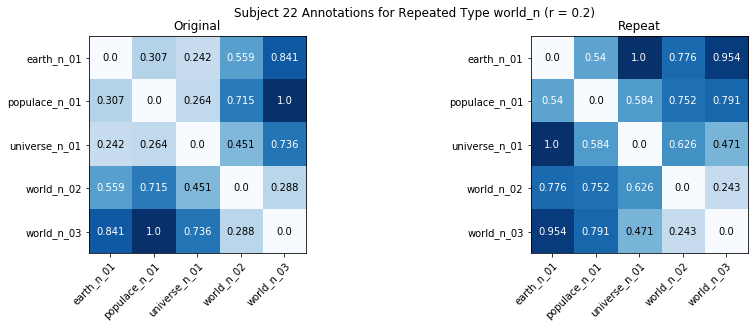

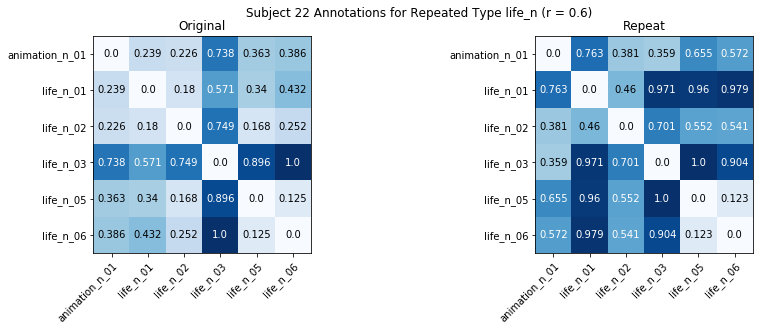

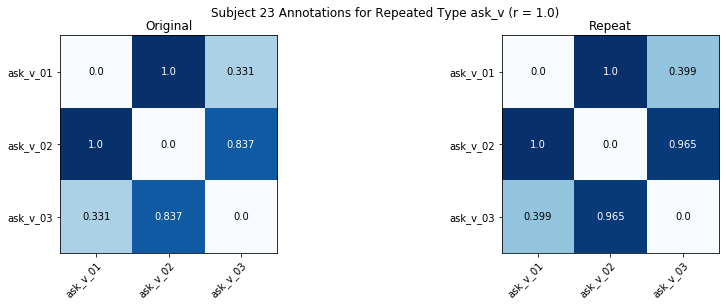

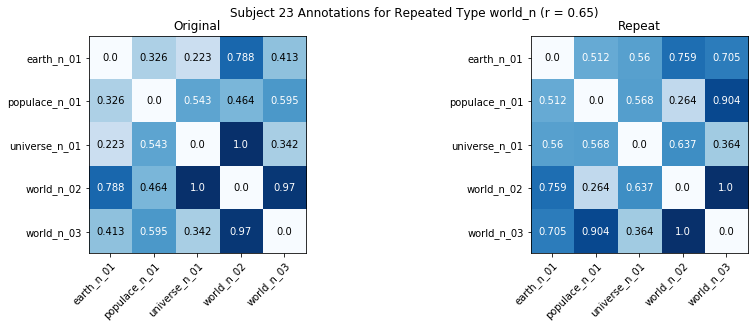

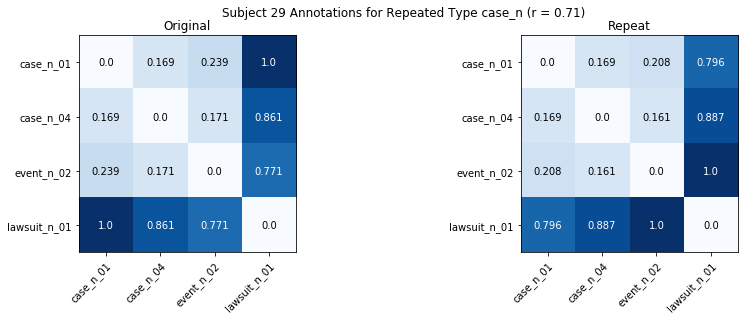

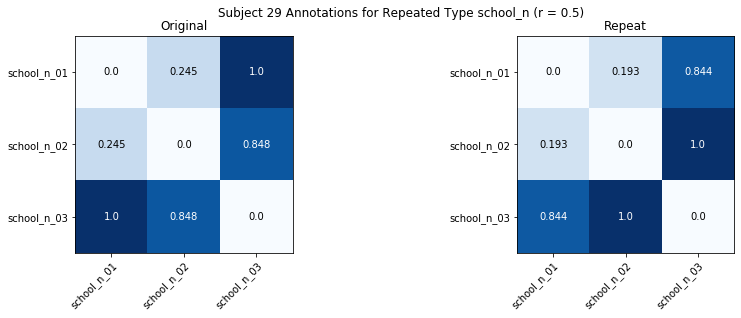

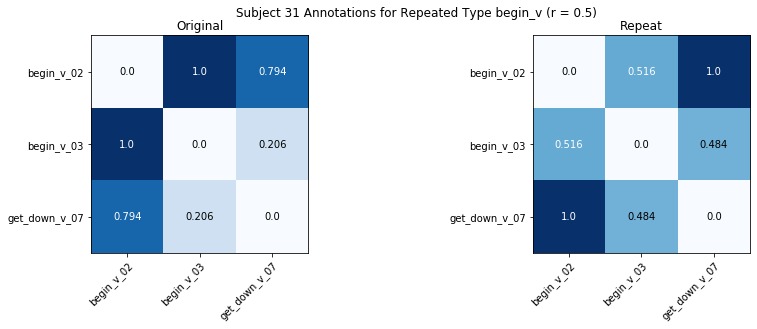

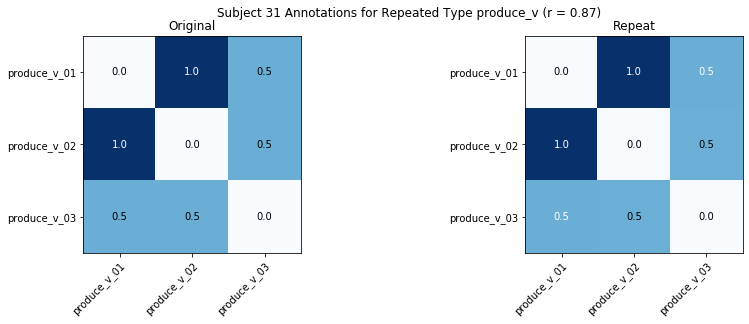

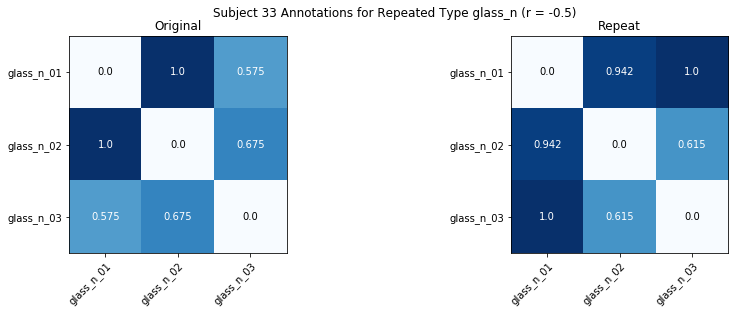

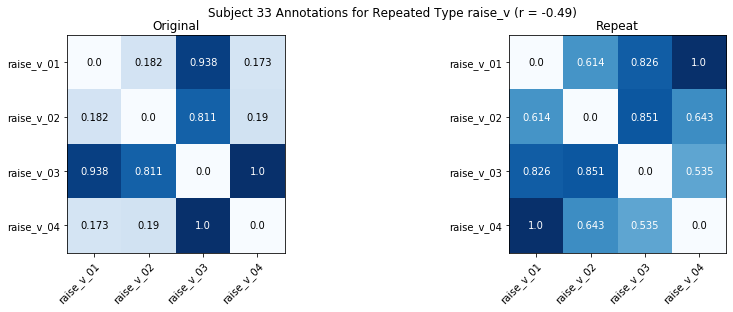

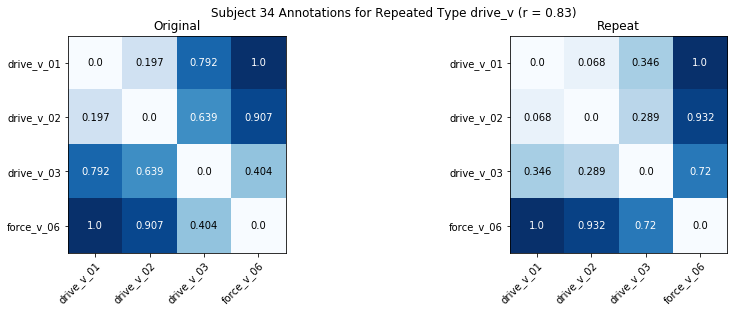

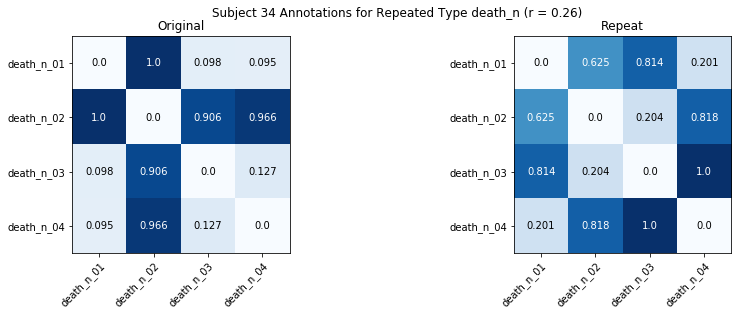

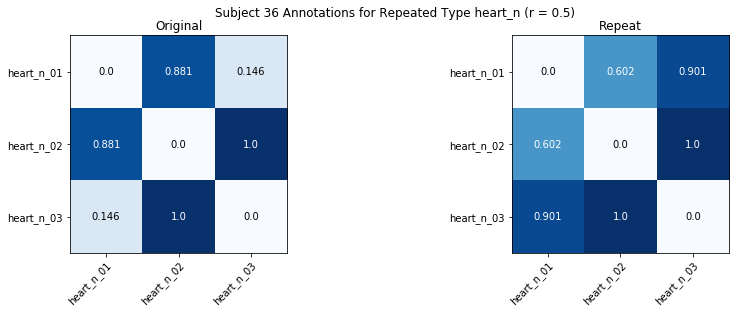

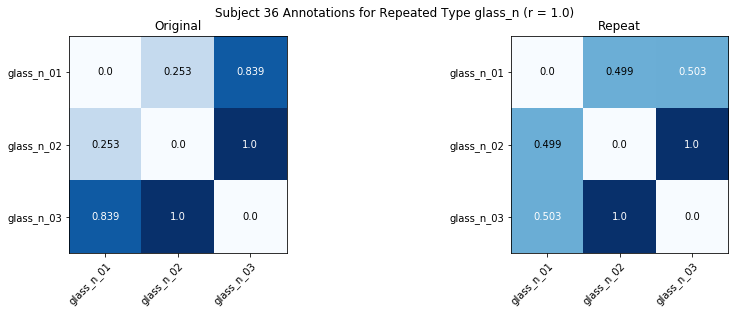

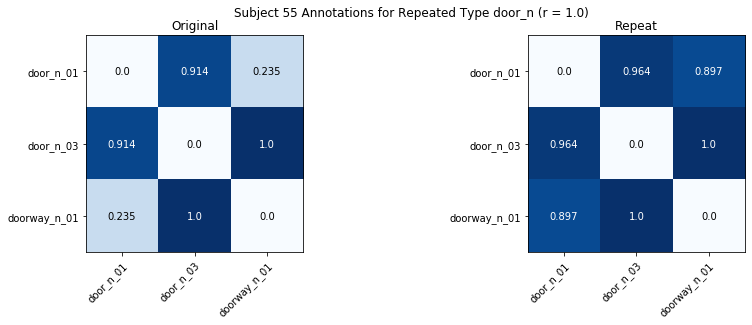

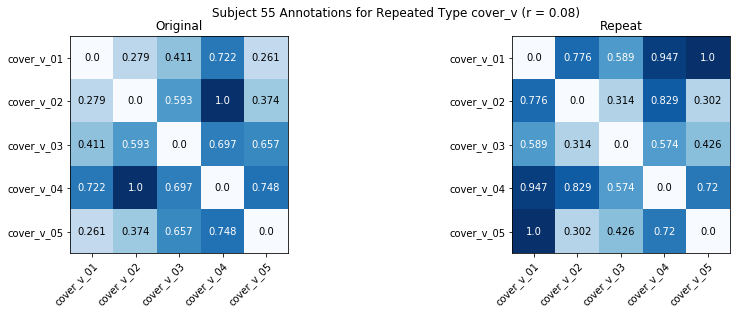

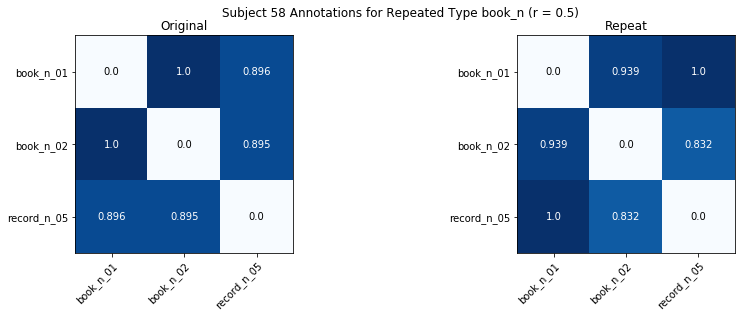

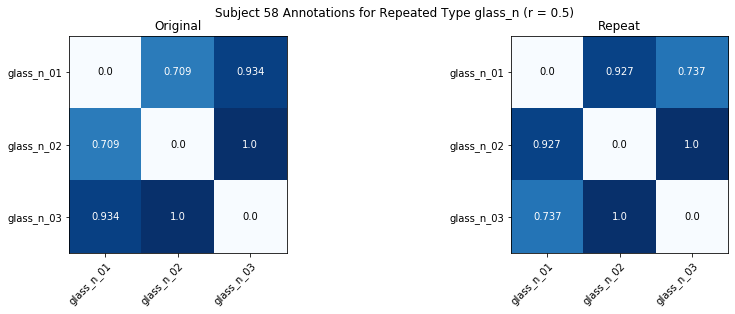

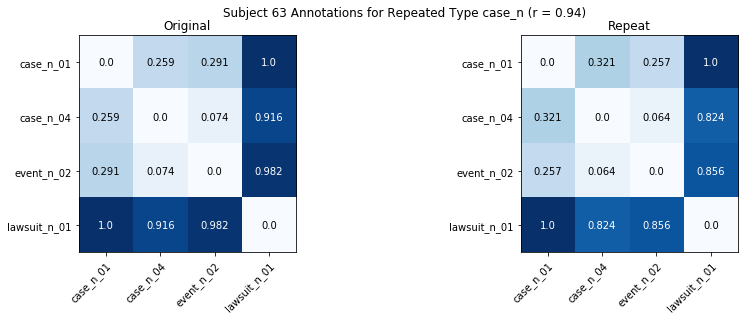

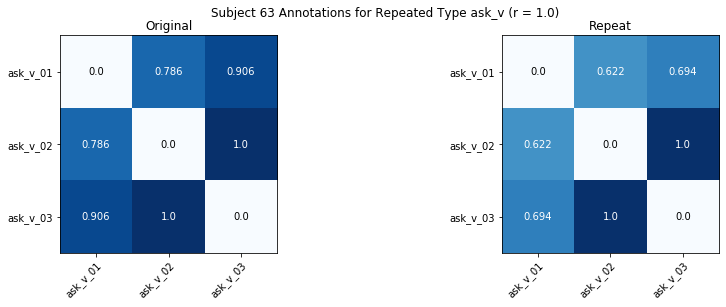

In [9]:
repeat_corr = all_repeats(results, users, plot = True)

## Shared Words

All subjects received a set of homonymous words. It appears there's some consistency in the results for foot, table, degree, and plane, but model and right were harder to distinguish.

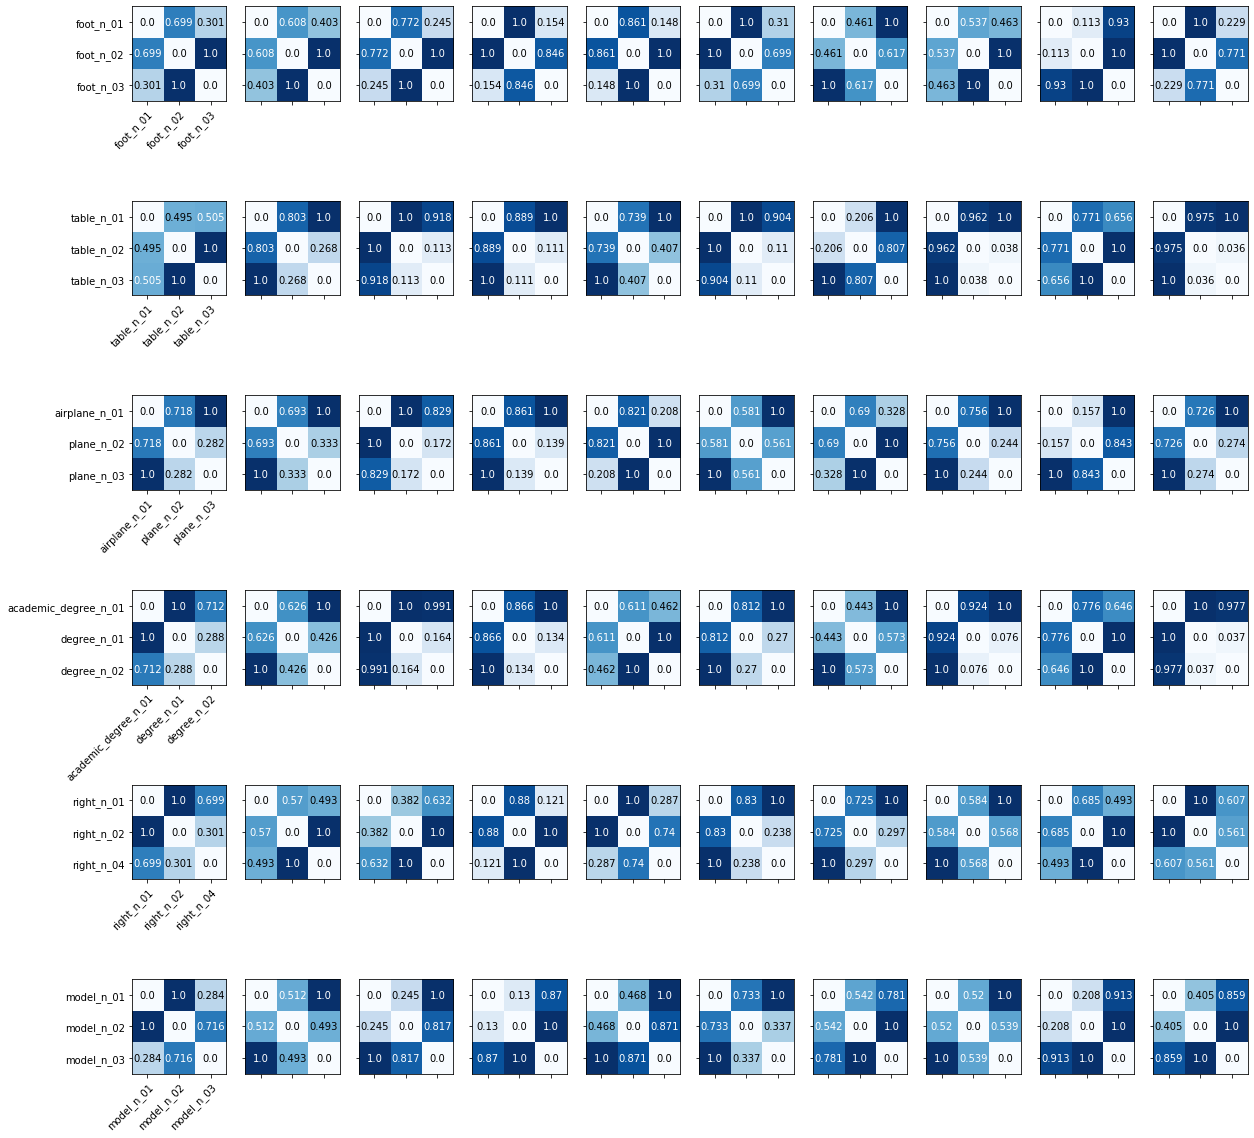

In [31]:
plot_all_shared(results, users)

Spearman rank correlations between one subject's data and the average of the rest of the subjects

In [10]:
shared_results = results[results['trialType'] == 'shared']
shared_corrs = group_consistency(shared_results, users)

Hold One Out Correlation for User 22 0.03363679835157265
Hold One Out Correlation for User 23 0.767339462395251
Hold One Out Correlation for User 29 0.6664290673405332
Hold One Out Correlation for User 31 0.5444956733160823
Hold One Out Correlation for User 33 0.06096669701222543
Hold One Out Correlation for User 34 0.49298932584023664
Hold One Out Correlation for User 36 -0.21128113964581569
Hold One Out Correlation for User 55 0.8146412100771501
Hold One Out Correlation for User 58 -0.21233228959430236
Hold One Out Correlation for User 63 0.7179354148163788


## MDS for Shared Trials

In [10]:
all_shared_defs = display_sense_definitions(results, 'shared')

,Sense,Type,Definition
212,foot_n_01,foot_n,the part of the leg of a human being below the ankle joint
213,foot_n_02,foot_n,a linear unit of length equal to 12 inches or a third of a yard
214,foot_n_03,foot_n,the lower part of anything


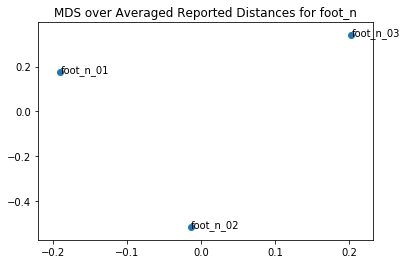

In [11]:
plot_individual_mds(results, 'foot_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
215,table_n_01,table_n,a set of data arranged in rows and columns
216,table_n_02,table_n,a piece of furniture having a smooth flat top that is usually supported by one or more vertical legs
217,table_n_03,table_n,a piece of furniture with tableware for a meal laid out on it


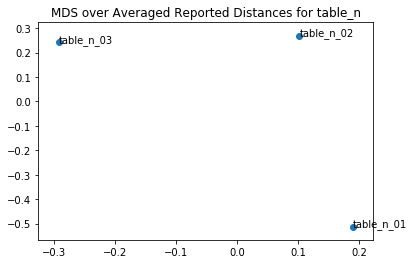

In [12]:
plot_individual_mds(results, 'table_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
218,airplane_n_01,plane_n,an aircraft that has a fixed wing and is powered by propellers or jets
219,plane_n_02,plane_n,(mathematics) an unbounded two-dimensional shape
220,plane_n_03,plane_n,a level of existence or development


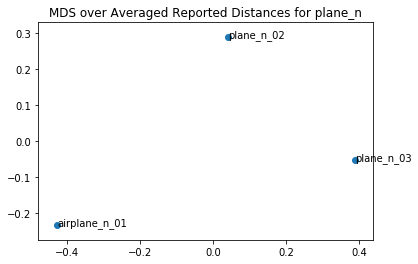

In [13]:
plot_individual_mds(results, 'plane_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
221,academic_degree_n_01,degree_n,an award conferred by a college or university signifying that the recipient has satisfactorily completed a course of study
222,degree_n_01,degree_n,a position on a scale of intensity or amount or quality
223,degree_n_02,degree_n,a specific identifiable position in a continuum or series or especially in a process


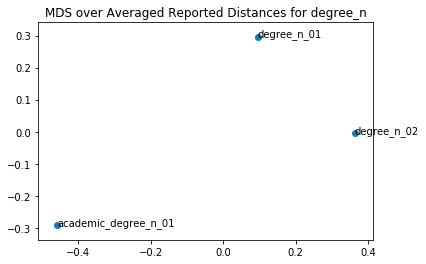

In [14]:
plot_individual_mds(results, 'degree_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
224,right_n_01,right_n,an abstract idea of that which is due to a person or governmental body by law or tradition or nature; ; - Eleanor Roosevelt
225,right_n_02,right_n,location near or direction toward the right side; i.e. the side to the south when a person or object faces east
226,right_n_04,right_n,those who support political or social or economic conservatism; those who believe that things are better left unchanged


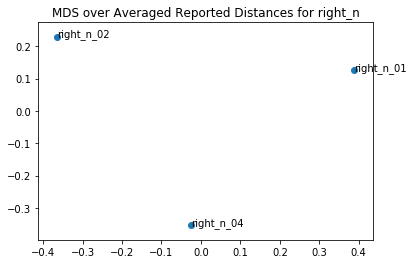

In [15]:
plot_individual_mds(results, 'right_n', 'shared', users, db, all_shared_defs)

,Sense,Type,Definition
227,model_n_01,model_n,a hypothetical description of a complex entity or process
228,model_n_02,model_n,a type of product
229,model_n_03,model_n,a person who poses for a photographer or painter or sculptor


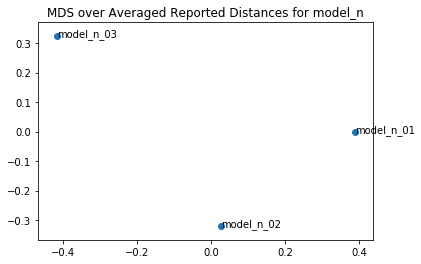

In [16]:
plot_individual_mds(results, 'model_n', 'shared', users, db, all_shared_defs)

## Consistency Metrics

In [11]:
user_time_word_changes = get_time_and_changes(results, user_df)
consistency = pd.DataFrame({'Group Consistency': shared_corrs, 'Self Consistency': repeat_corr})
corrs = user_time_word_changes.merge(consistency, on = user_time_word_changes.index).drop('key_0', axis = 1)
corrs['Correlation with SN'] = my_correlations(participants, trials, results, users)
filtered_corrs = corrs[(corrs['timeTaken'] != min(corrs['timeTaken'])) & (corrs['changes'] != min(corrs['changes']))]
print(np.mean(filtered_corrs['Self Consistency']))
filtered_corrs

0.5761336894004988


,userID,timeTaken,changes,Group Consistency,Self Consistency,Correlation with SN
0,-M3pVTw9ili6muvdZKg4,546.814,5,0.033637,0.459407,0.328158
1,-M3qqejnlf4v_ja8eE7n,526.296,3,0.767339,0.734160,0.782120
2,-M3rSxyqKh87n8IxCNFz,597.604,14,0.666429,0.655462,0.571734
3,-M3tou9y2NuJSM2wEped,712.426,10,0.544496,0.850841,0.585118
5,-M3xbEdg3XIZca4MA7SZ,924.305,9,0.492989,0.342105,0.731799
7,-M4RJU1sPJwCqxkN93qZ,706.181,11,0.814641,0.216253,0.790685
8,-M4WPYQVe_g2Cz7JGkvf,380.887,3,-0.212332,0.367647,-0.276231
9,-M4albOg4dRkfficH-mE,512.693,5,0.717935,0.983193,0.781049


In [13]:
np.mean(corrs.timeTaken) / 60

10.228906666666667

**timeTaken:** Duration of experiment for each user (in seconds)

**Changes:** Number of times a subject changed the existing layout (benefit of grid layout over similarity judgements) 

**Group Consistency:** Hold one out correlation on shared trials (taken from above results). Spearman rank correlation with subject's matrix and the average of all the other subjects' matrices.

**Self Consistency**: Spearman rank correlation over the two repeated words a participant received

**Correlation with SN:** The leftmost column in the dataframe is the Spearman rank correlation with my results, which would be the closet thing we have to ground truth data. For all the shared words, my correlation with the average was 1 for plane.n, degree.n, foot.n, and table.n, and 0.5 for right.n and model.n.

We replicate the self and group consistency metrics with matrices initialized for 100 random subjects.

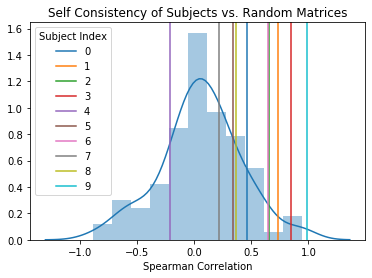

In [25]:
random_self = simulate_self_correlation(100, db)
plot_consistency_hist(random_self, corrs['Self Consistency'], 
                      "Self Consistency of Subjects vs. Random Matrices")

In [ ]:
np.mean(random_self)

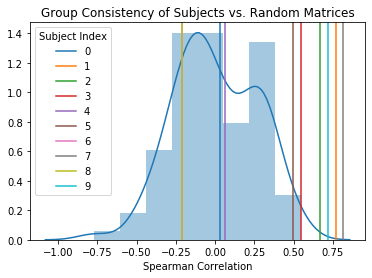

In [26]:
random_group = [random_vs_all(shared_results) for _ in range(100)]
plot_consistency_hist(random_group, corrs['Group Consistency'], 
                      "Group Consistency of Subjects vs. Random Matrices")

Trusted Users

In [24]:
trusted_df = participants[participants['workerID'].str.startswith("pilot") & participants['completedTask'] == 1]
trusted_users = trusted_df['userID']
trusted_results = trials[trials['userID'].isin(trusted_users)]

User 62  Correlation  0.5882352941176471
User 65  Correlation  -0.10175438596491228
Correlation of all original vs. repeat trials 0.14248366013071898


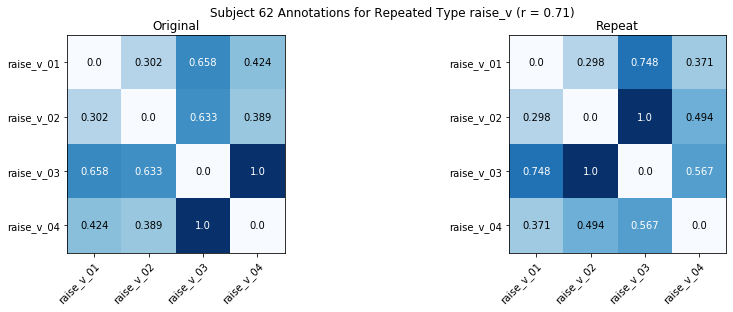

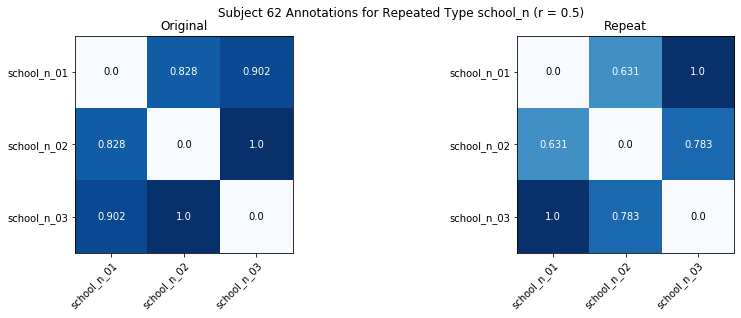

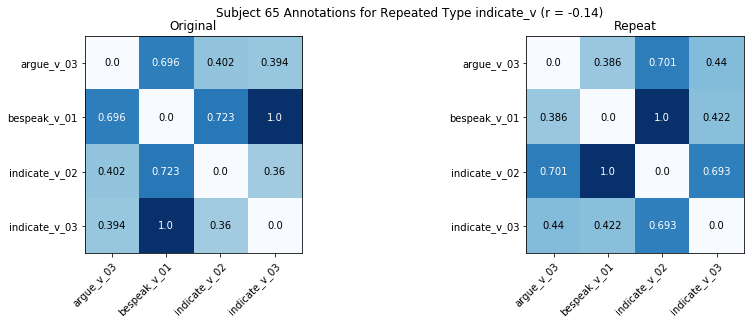

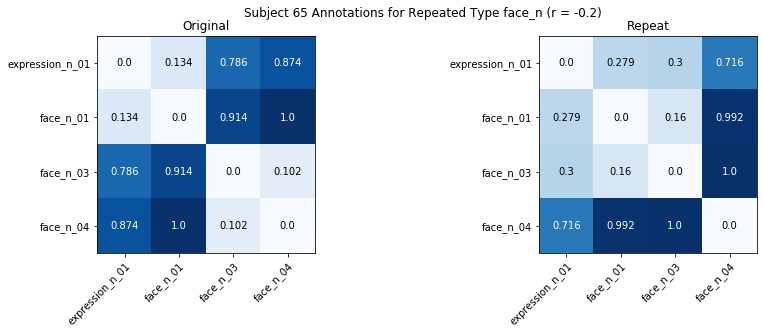

In [25]:
trusted_self_corr = plot_all_repeats(trusted_results, trusted_users)

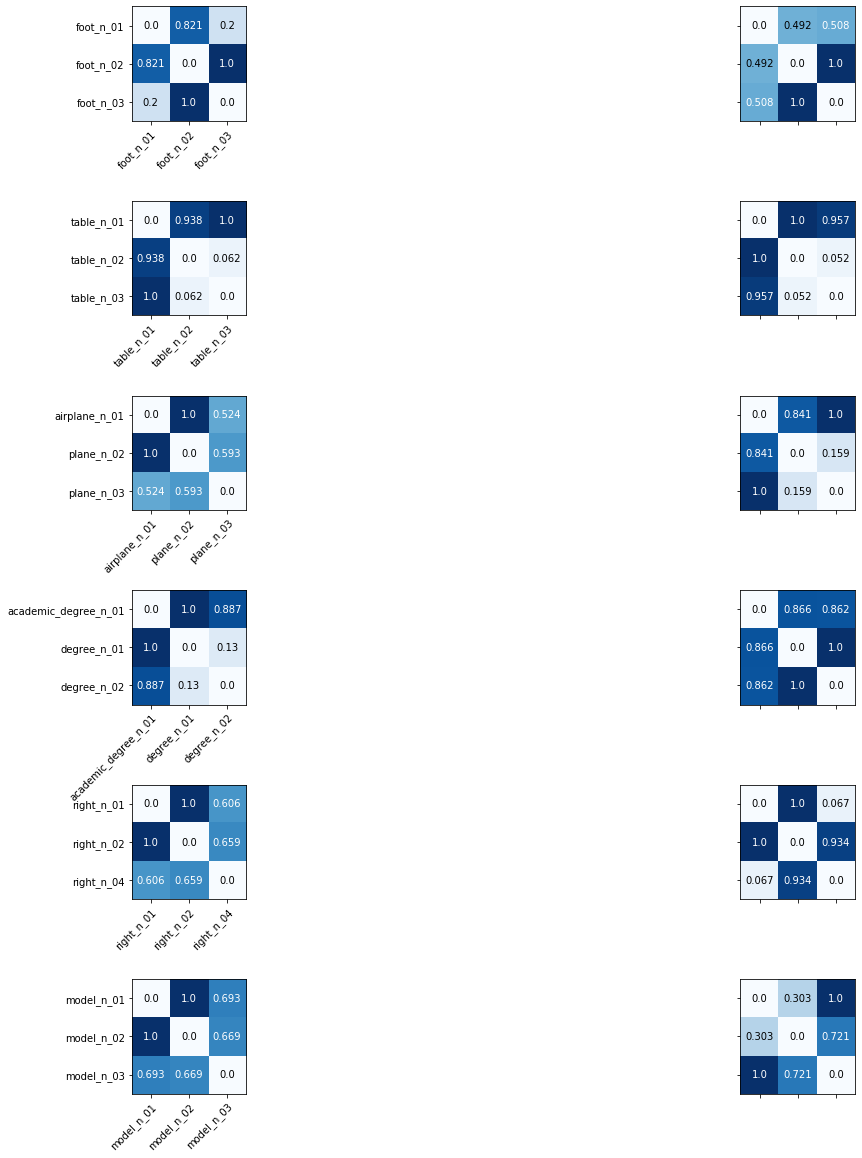

In [19]:
plot_all_shared(trusted_results, trusted_users)

In [20]:
def my_correlations(participants, trials, results, userids):
    complete = participants[participants['completedTask'] == 1]
    my_userid = complete.iloc[1]['userID']
    gt_results = trials[trials['userID'] == my_userid]
    shared_plus_gt = pd.concat([results, gt_results])
    shared_plus_gt = shared_plus_gt[shared_plus_gt['trialType'] == 'shared']
    return [user_vs_user_shared(shared_plus_gt, u, my_userid) for u in userids]


In [21]:
my_correlations(participants, trials, trusted_results, trusted_users)

[0.6472162740899358, 0.5449678800856531]